## Time Gaps (2-14 hours) ##

(linked to Eric Bellm's SCOC 2021 Cadence Note regarding time gaps between 2-14 hours)

Transient and variability studies would prefer a logarithmic distribution of time gaps between visits, in order to study variability on all time scales. The typical cadence on the other hand, tends to place pairs of visits within a night at about 30 minutes separation and then return a few days later. Depending on the details of the cadence (in particular, if rolling cadence is implemented), this internight gap may be longer or shorter, but we do have a dearth of visits in the 2-14 hour timescales usually. 

This notebook looks at the distribution of visits acquired with longer-than-typical-pair intervals, within a night.
The metric itself can be used for any range of times.

In [1]:
import glob
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

from rubin_sim.data import get_baseline

In [2]:
# Create an output directory and connect to the current baseline simulation, available in $RUBIN_SIM_DATA_DIR
outDir = 'temp_tgaps'

dbfile = get_baseline()

runName = os.path.split(dbfile)[-1].replace('.db', '')
opsdb = maf.db.OpsimDatabase(dbfile)

print(runName)

baseline_nexp2_v1.7_10yrs


In [3]:
# Look at the distribution of tgaps .. a 'big set' of Tgaps metrics for each filter and all filters is in

tgaps_dict, pb = maf.batches.timeGaps(runName=runName)

list(tgaps_dict.keys())

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


['baseline_nexp2_v1_7_10yrs_Tgaps_observationStartMJD_all_bands_HEAL',
 'baseline_nexp2_v1_7_10yrs_TgapsPercent_2-14hrs_all_bands_HEAL',
 'baseline_nexp2_v1_7_10yrs_TgapsPercent_1day_all_bands_HEAL',
 'baseline_nexp2_v1_7_10yrs_Tgaps_observationStartMJD_u_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_TgapsPercent_2-14hrs_u_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_TgapsPercent_1day_u_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_Tgaps_observationStartMJD_g_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_TgapsPercent_2-14hrs_g_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_TgapsPercent_1day_g_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_Tgaps_observationStartMJD_r_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_TgapsPercent_2-14hrs_r_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_TgapsPercent_1day_r_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_Tgaps_observationStartMJD_i_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_TgapsPercent_2-14hrs_i_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_TgapsPercent_1day_i_band_HEAL',
 'baseline_nexp2_v1_7_10yrs_Tgaps_ob

In [4]:
resultsDb = maf.db.ResultsDb(outDir)

g = maf.MetricBundleGroup(tgaps_dict, opsdb, outDir=outDir, resultsDb=resultsDb)
g.runAll()

Querying database SummaryAllProps with no constraint for columns ['observationStartMJD', 'rotSkyPos', 'fieldRA', 'fieldDec'].
Found 2045493 visits
Running:  ['baseline_nexp2_v1_7_10yrs_Tgaps_observationStartMJD_all_bands_HEAL', 'baseline_nexp2_v1_7_10yrs_TgapsPercent_2-14hrs_all_bands_HEAL', 'baseline_nexp2_v1_7_10yrs_TgapsPercent_1day_all_bands_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "i" for columns ['observationStartMJD', 'rotSkyPos', 'fieldRA', 'fieldDec']
Found 455743 visits
Running:  ['baseline_nexp2_v1_7_10yrs_Tgaps_observationStartMJD_i_band_HEAL', 'baseline_nexp2_v1_7_10yrs_TgapsPercent_2-14hrs_i_band_HEAL', 'baseline_nexp2_v1_7_10yrs_TgapsPercent_1day_i_band_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "r" for columns ['observationStartMJD', 'rotSkyP

No handles with labels found to put in legend.


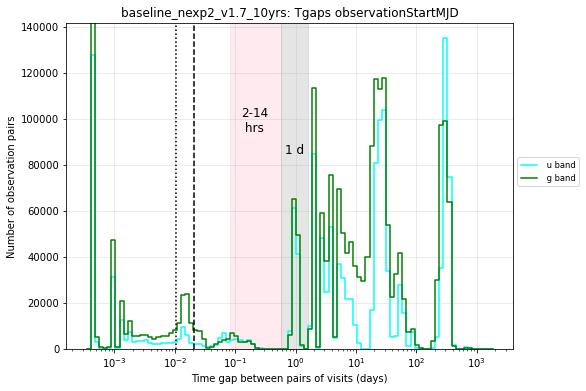

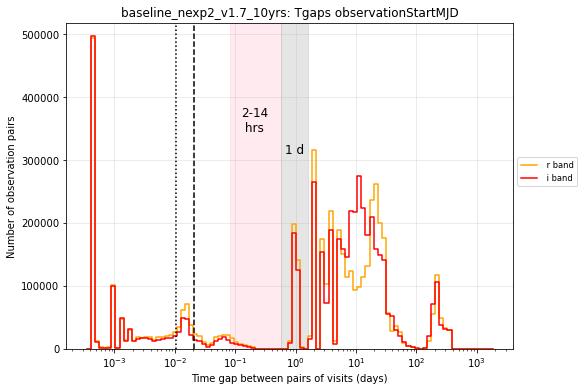

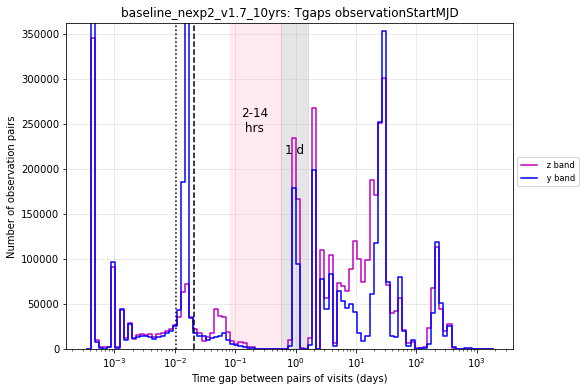

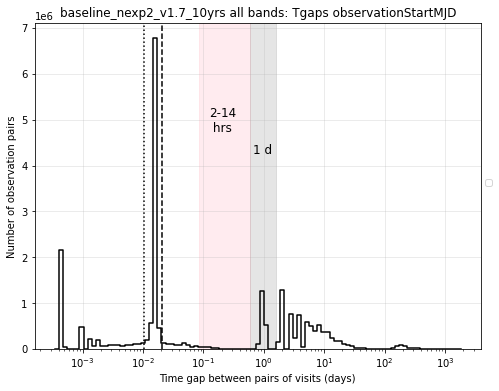

In [5]:
# Plot all of the TGaps metric results (with summary histogram)
# Plot them in sets of two filters for more readable plots
for filtersets in (['u_band', 'g_band'], ['r_band', 'i_band'], ['z_band', 'y_band'], ['all_bands', 'filler']):
    ph = maf.PlotHandler(outDir=outDir, figformat='png', thumbnail=False)
    tgaps = []
    for t in tgaps_dict:
        if 'Tgaps_observation' in t:
            if filtersets[0] in t or filtersets[1] in t:
                tgaps.append(tgaps_dict[t])
    ph.setMetricBundles(tgaps)
    plotDict = {'xscale': 'log', 'yMin': 0, 'figsize': (8, 6), 
                'ylabel': 'Number of observation pairs', 
                'xlabel': 'Time gap between pairs of visits (days)',
                'legendloc': (1.01, 0.5)}
    ph.plot(plotFunc=maf.SummaryHistogram(), plotDicts=plotDict)

    y1, y2 = plt.ylim()
    plt.fill_between([2/24, 14/24], y1=y1, y2=y2, color='pink', alpha=0.3)
    plt.fill_between([14/24, 38/24], y1=y1, y2=y2, color='grey', alpha=0.2)
    plt.axvline(30/60/24, linestyle='--', color='k')
    plt.axvline(15/60/24, linestyle=':', color='k')
    plt.text(3/24., (y2+y1)*2/3., '2-14\n hrs', fontsize='large')
    plt.text(16/24., (y2+y1)*1.8/3, '1 d', fontsize='large')

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


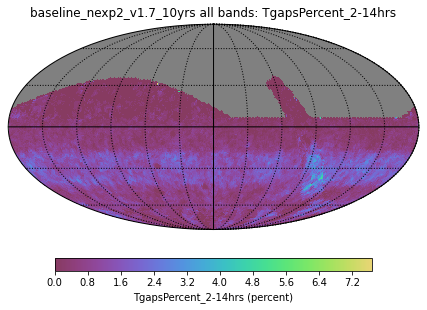

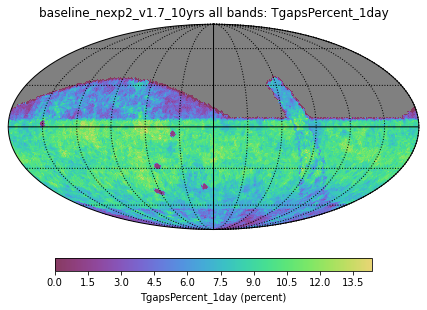

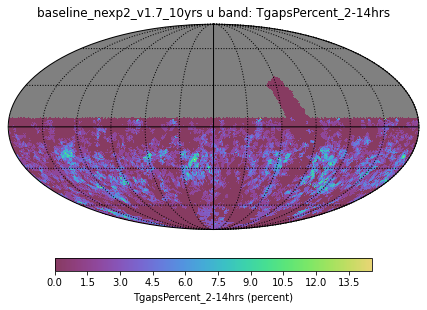

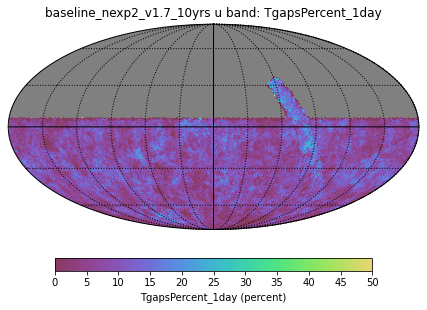

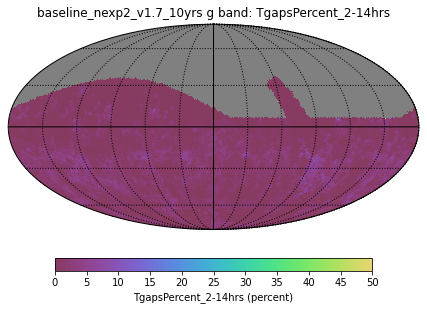

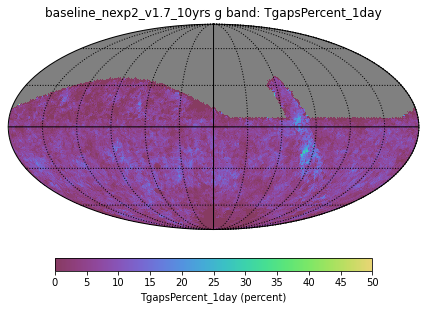

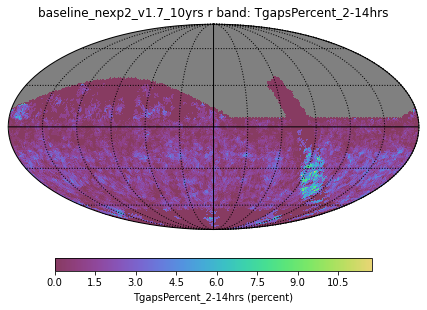

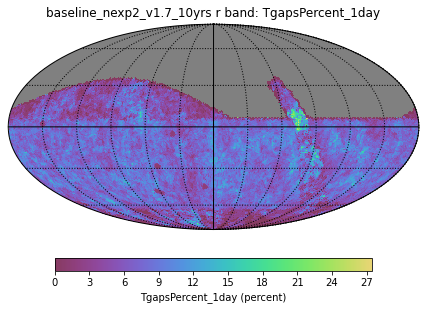

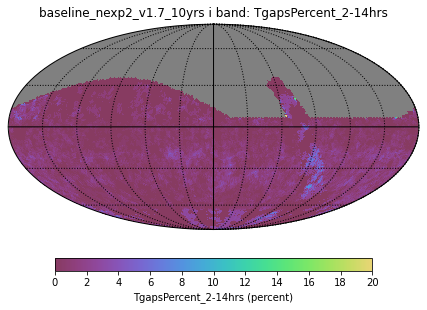

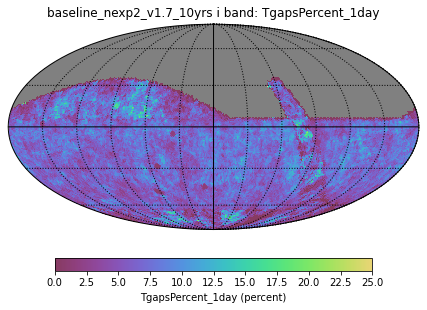

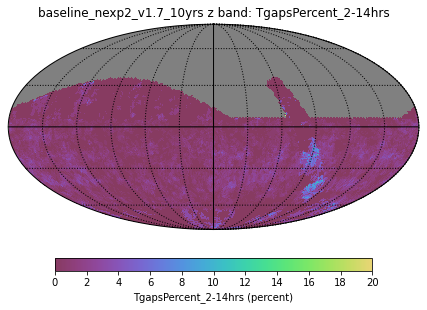

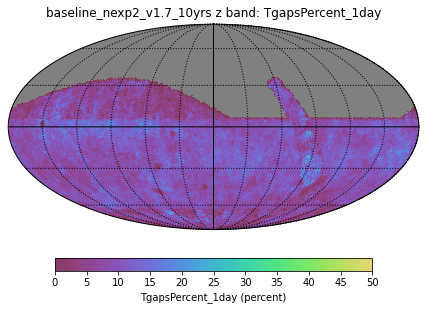

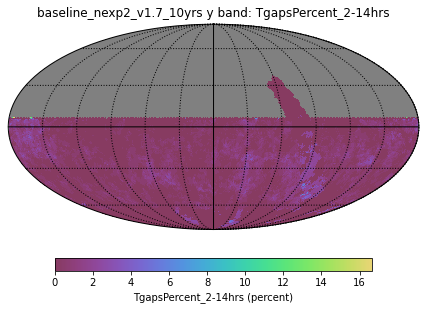

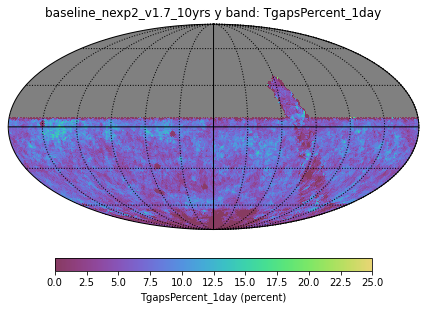

In [6]:
# We could look at the TGapsPercent values across the sky to see if they change significantly
tperc = []
for t in tgaps_dict:
    if 'TgapsPercent' in t:
        tperc.append(tgaps_dict[t])

for t in tperc:
    ph.setMetricBundles([t])
    ph.plot(plotFunc=maf.HealpixSkyMap())

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 526 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 290 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 265 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:99: UserWarning: Optimal bin calculation tried to make 425 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


2

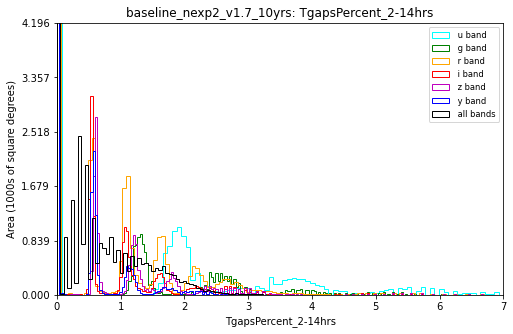

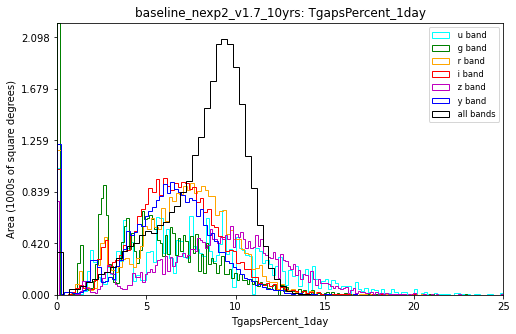

In [7]:
tperc = []
for t in tgaps_dict:
    if 'TgapsPercent_2-14hrs' in t:
        tperc.append(tgaps_dict[t])
        
ph.setMetricBundles(tperc)
plotDict = {'figsize':(8, 5), 'xMin': 0, 'xMax': 7, 'yMax': 5000}
ph.plot(plotFunc=maf.HealpixHistogram(), plotDicts=plotDict)

tperc = []
for t in tgaps_dict:
    if 'TgapsPercent_1day' in t:
        tperc.append(tgaps_dict[t])
        
ph.setMetricBundles(tperc)
plotDict = {'figsize': (8,5), 'xMin': 0, 'xMax': 25}
ph.plot(plotFunc=maf.HealpixHistogram(), plotDicts=plotDict)

In [8]:
# And we can also look at the summary statistics from each of the TGapsPercent metrics
tperc = []
for t in tgaps_dict:
    if 'TgapsPercent' in t:
        tperc.append(tgaps_dict[t])

pd.DataFrame([t.summaryValues for t in tperc], index=[f"{t.metadata} \
                            {t.metric.name.replace('TgapsPercent_', '')}" for t in tperc])

,Mean,Rms,Median,Max,Min,N(+3Sigma),N(-3Sigma),Count,25th%ile,75th%ile
all bands 2-14hrs,0.773323,0.655573,0.598086,7.692308,0.0,203,0,32612,0.252127,1.210654
all bands 1day,8.157599,2.463456,8.761682,14.355231,0.0,0,440,32612,6.883172,9.872082
u band 2-14hrs,1.570960,1.932435,1.612903,14.583333,0.0,365,0,27950,0.000000,2.272727
u band 1day,8.134597,4.347318,7.843137,50.000000,0.0,165,0,27950,5.263158,10.869565
g band 2-14hrs,1.072235,1.407609,0.000000,50.000000,0.0,398,0,32442,0.000000,1.515152
g band 1day,5.561850,3.345585,5.333333,50.000000,0.0,248,0,32442,3.030303,7.594937
r band 2-14hrs,1.029192,1.103552,0.917431,11.764706,0.0,523,0,32502,0.000000,1.612903
r band 1day,6.961624,2.957459,7.228916,27.500000,0.0,121,0,32502,5.319149,8.854167
i band 2-14hrs,0.722352,0.929998,0.531915,20.000000,0.0,385,0,32505,0.000000,1.098901
i band 1day,6.475603,2.692756,6.521739,25.000000,0.0,139,0,32505,4.901961,8.152174


## Compare with another simulation ## 

This could be extended to work with multiple simulations, but adding even one additional simulation demonstrates the effect.

In [9]:
dbfile = '/Users/lynnej/opsim/baseline/baseline_v2.0_10yrs.db'
runName = os.path.split(dbfile)[-1].replace('.db', '')
opsdb = maf.db.OpsimDatabase(dbfile)

print(runName)

baseline_v2.0_10yrs


In [10]:
tgaps_dict2, pb = maf.batches.timeGaps(runName=runName)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [11]:
g = maf.MetricBundleGroup(tgaps_dict2, opsdb, outDir=outDir, resultsDb=resultsDb)
g.runAll()

Querying database observations with no constraint for columns ['observationStartMJD', 'rotSkyPos', 'fieldRA', 'fieldDec'].
Found 2086980 visits
Running:  ['baseline_v2_0_10yrs_Tgaps_observationStartMJD_all_bands_HEAL', 'baseline_v2_0_10yrs_TgapsPercent_2-14hrs_all_bands_HEAL', 'baseline_v2_0_10yrs_TgapsPercent_1day_all_bands_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "i" for columns ['observationStartMJD', 'rotSkyPos', 'fieldRA', 'fieldDec']
Found 473684 visits
Running:  ['baseline_v2_0_10yrs_Tgaps_observationStartMJD_i_band_HEAL', 'baseline_v2_0_10yrs_TgapsPercent_2-14hrs_i_band_HEAL', 'baseline_v2_0_10yrs_TgapsPercent_1day_i_band_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database observations with constraint filter = "r" for columns ['observationStartMJD', 'rotSkyPos', 'fieldRA', 'fieldDec']
Found 464851 visi

Text(0.6666666666666666, 4267970.28, '1 d')

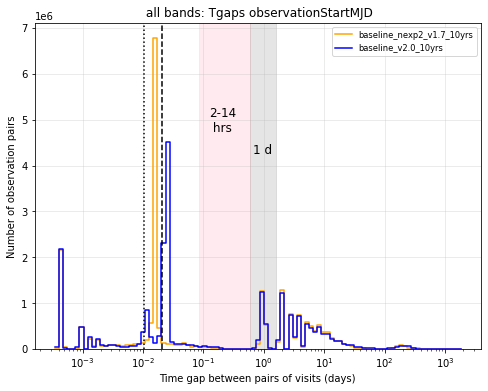

In [12]:
# And plot both of the summary histograms of the tgaps together
ph = maf.PlotHandler(outDir=outDir, thumbnail=False, savefig=False)

# just the 'all' bands
tgaps = []
for t in tgaps_dict:
    if 'Tgaps_observation' in t and 'all_bands' in t:
        tgaps.append(tgaps_dict[t])
for t in tgaps_dict2:
    if 'Tgaps_observation' in t and 'all_bands' in t:
        tgaps.append(tgaps_dict2[t])

ph.setMetricBundles(tgaps)
plotDicts = [{'color': 'orange'}, {'color': 'blue', 'figsize': (8, 5)}]
ph.plot(plotFunc=maf.SummaryHistogram(), plotDicts=plotDicts)

y1, y2 = plt.ylim()
plt.fill_between([2/24, 14/24], y1=y1, y2=y2, color='pink', alpha=0.3)
plt.fill_between([14/24, 38/24], y1=y1, y2=y2, color='grey', alpha=0.2)
plt.axvline(30/60/24, linestyle='--', color='k')
plt.axvline(15/60/24, linestyle=':', color='k')
plt.text(3/24., (y2+y1)*2/3., '2-14\n hrs', fontsize='large')
plt.text(16/24., (y2+y1)*1.8/3, '1 d', fontsize='large')

In [13]:
# And we can also look at the summary statistics from each of the TGapsPercent metrics
tperc = []
for t in tgaps_dict2:
    if 'TgapsPercent' in t:
        tperc.append(tgaps_dict2[t])

pd.DataFrame([t.summaryValues for t in tperc], index=[f"{t.metadata} \
                            {t.metric.name.replace('TgapsPercent_', '')}" for t in tperc])

,Mean,Rms,Median,Max,Min,N(+3Sigma),N(-3Sigma),Count,25th%ile,75th%ile
all bands 2-14hrs,1.084968,0.857833,0.940071,33.333333,0.0,60,0,33684,0.446429,1.575758
all bands 1day,8.117337,3.024147,9.134615,14.993804,0.0,0,0,33684,5.837317,10.320489
u band 2-14hrs,1.402515,1.870519,0.000000,20.000000,0.0,386,0,30328,0.000000,2.000000
u band 1day,5.209095,3.754412,5.084746,50.000000,0.0,245,0,30328,2.325581,7.407407
g band 2-14hrs,0.618449,0.982344,0.000000,7.142857,0.0,468,0,33545,0.000000,1.351351
g band 1day,4.925326,3.034305,4.687500,33.333333,0.0,113,0,33545,2.631579,6.944444
r band 2-14hrs,1.509906,1.403567,1.470588,100.000000,0.0,152,0,33593,0.000000,2.259887
r band 1day,8.341440,3.935771,8.994709,20.338983,0.0,2,0,33593,5.759162,11.176471
i band 2-14hrs,1.286057,1.300983,1.086957,50.000000,0.0,317,0,33602,0.000000,2.040816
i band 1day,7.239023,3.537672,7.692308,25.000000,0.0,3,0,33602,4.819277,9.793814
